<a href="https://colab.research.google.com/github/6Quarkup/EDA-project-2/blob/main/Data_analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing** **Libraries**

In [4]:
from keras.models import Sequential
# It is the model type we are using because it will allow us to build the model 
#layer by layer with weights corresponding to the next layer.
from keras.layers import Dense, Dropout
# Dense is the layer type. Here all the previous layer nodes are connected to 
#the nodes in current layer.
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
np.random.seed(2)
# It generates pseudo random numbers called seed value. So same random number is
#generated everytime.

In [5]:
dataset= pd.read_csv("/content/diabetes.csv")

dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**EDA**

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


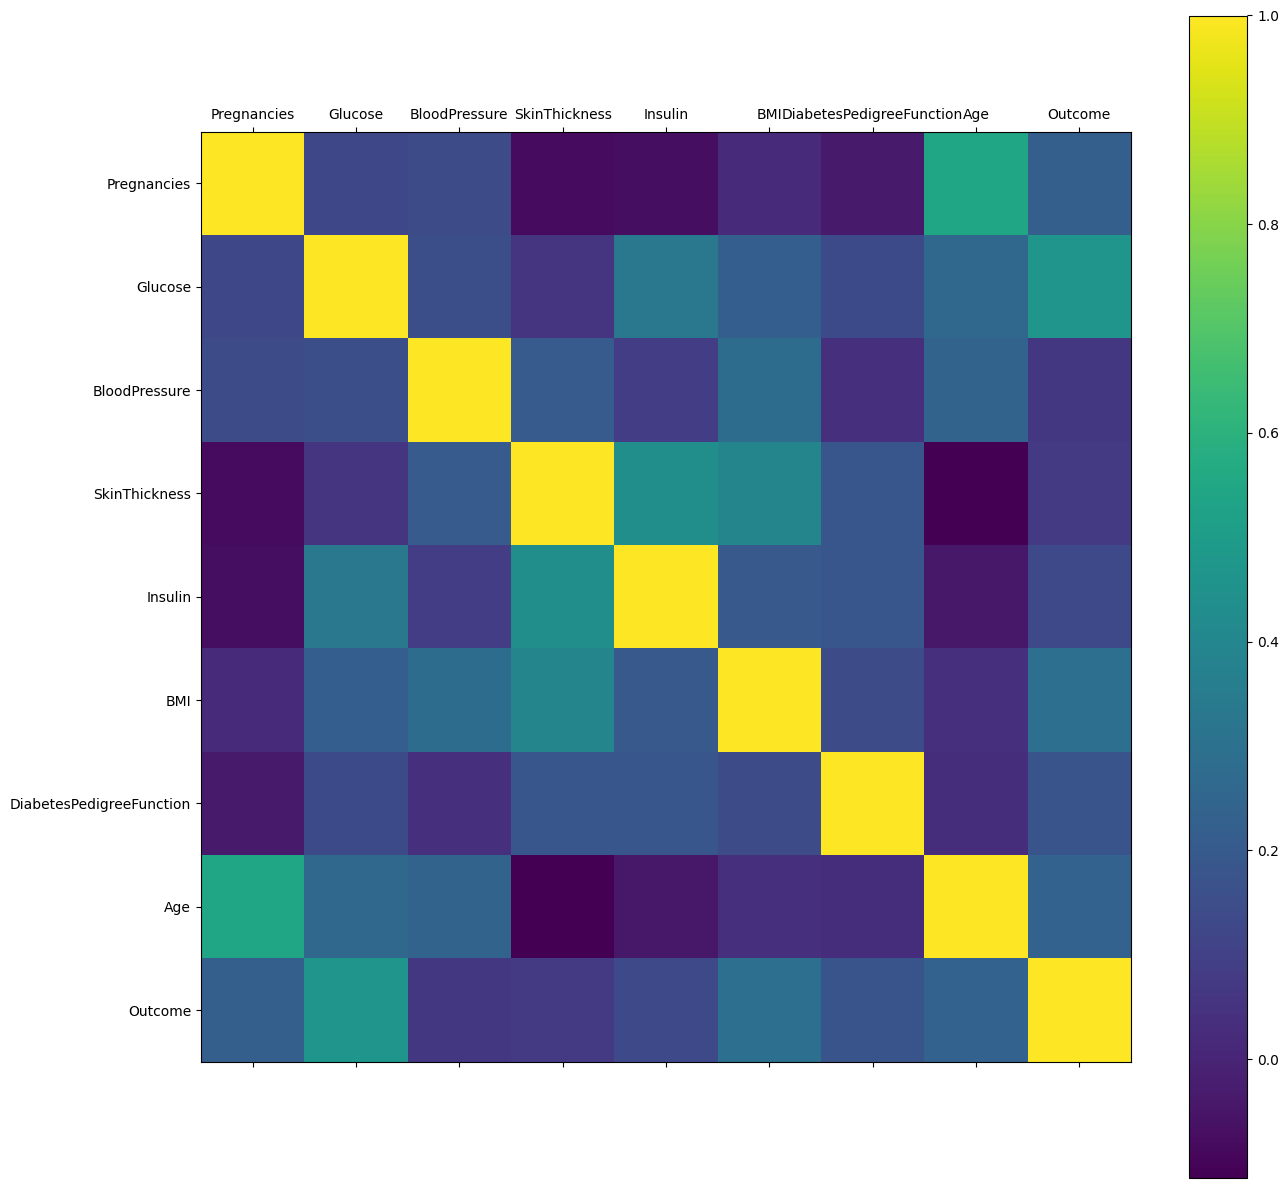

In [7]:
mp.rcParams['figure.figsize']= 15,15
# Allows us to change the size of our matrix
plt.matshow(dataset.corr())
# We are showing co-relation matrix to summararize the dataset and analyse the 
#co-relation between different features so that we svoid using un-necessary features.
plt.yticks(np.arange(dataset.shape[1]),dataset.columns)
plt.xticks(np.arange(dataset.shape[1]),dataset.columns)
plt.colorbar( )

We notice a slight co-relation between age-pregnancy and Glucose-outcome, yet the effect isn't greater than 0.8 so we don't make changes.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

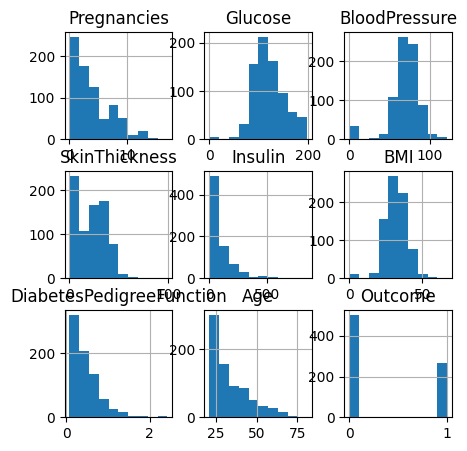

In [11]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

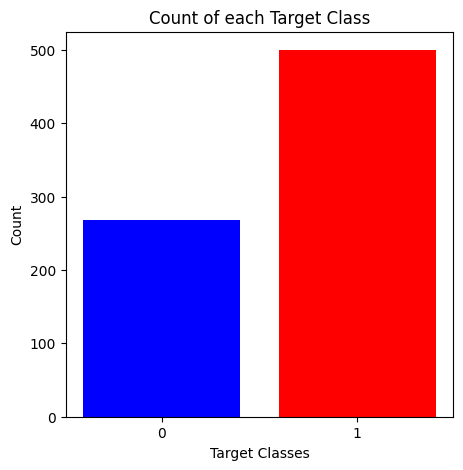

In [12]:
mp.rcParams['figure.figsize']=5,5
plt.bar(dataset['Outcome'].unique(), dataset['Outcome'].value_counts(),color=['red','blue'])
plt.xticks([0,1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [13]:
X= dataset.iloc[:,:-1]
Y=dataset.iloc[:,8]

Here, we wanted our X to have all input features and Y to have output.
So, X has data from 

In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


We are importing train-test split and dividing our data into train, test and validation set. Training set is used to train the data, validation for setting the optimum values for our hyper-parameters and testing for testing the values.

In [15]:
from sklearn.model_selection import train_test_split
X_train_all, X_test,y_train_all,y_test = train_test_split(X,Y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_all,y_train_all,random_state=42)

Then we standardise our data-

In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
dataset_std = scaler.fit_transform(dataset)
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [17]:
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
X_train.shape

(432, 8)

In [19]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Activation
from keras.activations import relu,sigmoid
from sklearn.tree import DecisionTreeClassifier

In [22]:
def my_model(layers, activation):
  model = Sequential()
  for i, nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes, input_dim=X_train.shape[1]))
      model.add(Activation(activation))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model
model = KerasClassifier(build_fn=my_model)      

<ipython-input-22-d51635709bf0>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=my_model)


In [23]:
model

In [24]:
layers = [[20],[40,33],[45,35,25],[50,40,30,20]]
activations = ['relu', 'sigmoid']
param_grid = dict(layers=layers, activation=activations, batch_size = [120,250], epochs=[30])
grid = GridSearchCV(estimator = model, param_grid=param_grid)

In [ ]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/30
3/3 [==============================] - 1s 10ms/step - loss: 3.4904 - accuracy: 0.6754
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 3.3915 - accuracy: 0.6812
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 3.3303 - accuracy: 0.6870
Epoch 4/30
3/3 [==============================] - 0s 7ms/step - loss: 3.2831 - accuracy: 0.6928
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 3.2362 - accuracy: 0.6957
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 3.1938 - accuracy: 0.7014
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 3.1779 - accuracy: 0.7043
Epoch 8/30
3/3 [==============================] - 0s 8ms/step - loss: 3.1367 - accuracy: 0.7014
Epoch 9/30
3/3 [==============================] - 0s 7ms/step - loss: 3.0709 - accuracy: 0.7043
Epoch 10/30
3/3 [==============================] - 0s 8ms/step - loss: 2.9864 - accuracy: 0.7159
Epoch 11/30
3/3 [=====================

1/1 [==============================] - 0s 144ms/step - loss: 1.4344 - accuracy: 0.5930
Epoch 1/30
3/3 [==============================] - 1s 6ms/step - loss: 2.1223 - accuracy: 0.6638
Epoch 2/30
3/3 [==============================] - 0s 5ms/step - loss: 1.5636 - accuracy: 0.6928
Epoch 3/30
3/3 [==============================] - 0s 5ms/step - loss: 0.9861 - accuracy: 0.7159
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 0.8785 - accuracy: 0.7072
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 0.7241 - accuracy: 0.7101
Epoch 6/30
3/3 [==============================] - 0s 5ms/step - loss: 0.7452 - accuracy: 0.7188
Epoch 7/30
3/3 [==============================] - 0s 5ms/step - loss: 0.7003 - accuracy: 0.7188
Epoch 8/30
3/3 [==============================] - 0s 5ms/step - loss: 0.6424 - accuracy: 0.7246
Epoch 9/30
3/3 [==============================] - 0s 5ms/step - loss: 0.5892 - accuracy: 0.7246
Epoch 10/30
3/3 [==============================] 

1/1 [==============================] - 0s 174ms/step - loss: 0.6615 - accuracy: 0.7471
Epoch 1/30
3/3 [==============================] - 1s 6ms/step - loss: 1.6644 - accuracy: 0.5884
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 1.4391 - accuracy: 0.6261
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 1.2135 - accuracy: 0.6435
Epoch 4/30
3/3 [==============================] - 0s 6ms/step - loss: 1.0653 - accuracy: 0.6725
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 0.9604 - accuracy: 0.6957
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 0.8606 - accuracy: 0.6986
Epoch 7/30
3/3 [==============================] - 0s 7ms/step - loss: 0.8038 - accuracy: 0.7159
Epoch 8/30
3/3 [==============================] - 0s 7ms/step - loss: 0.6773 - accuracy: 0.7043
Epoch 9/30
3/3 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.7159
Epoch 10/30
3/3 [==============================] 

In [26]:
        ``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````[grid_result.best_score_, grid_result.best_params_]

[0.7589949250221253,
 {'activation': 'relu', 'batch_size': 120, 'epochs': 30, 'layers': [40, 33]}]

In [27]:
model= Sequential()
model.add(Dense(55,input_dim=8,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1571"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4161 (Dense)           (None, 55)                495       
_________________________________________________________________
dense_4162 (Dense)           (None, 50)                2800      
_________________________________________________________________
dense_4163 (Dense)           (None, 40)                2040      
_________________________________________________________________
dense_4164 (Dense)           (None, 30)                1230      
_________________________________________________________________
dense_4165 (Dense)           (None, 20)                620       
_________________________________________________________________
dense_4166 (Dense)           (None, 1)                 21        
Total params: 7,206
Trainable params: 7,206
Non-trainable params: 0
_________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid))


Epoch 1/100
14/14 [==============================] - 1s 24ms/step - loss: 0.6878 - accuracy: 0.5463 - val_loss: 0.6616 - val_accuracy: 0.7500
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6348 - accuracy: 0.7500 - val_loss: 0.5866 - val_accuracy: 0.7778
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5503 - accuracy: 0.7731 - val_loss: 0.5042 - val_accuracy: 0.7986
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4780 - accuracy: 0.7685 - val_loss: 0.4767 - val_accuracy: 0.7847
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4455 - accuracy: 0.7801 - val_loss: 0.4661 - val_accuracy: 0.7917
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4204 - accuracy: 0.8009 - val_loss: 0.4752 - val_accuracy: 0.7639
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4050 - accuracy: 0.8171 - val_loss: 0.4725 - val_accuracy: 0.7986
Epoch 8/100

In [ ]:
m_test = model.evaluate(X_test,y_test)
print(m_test)

6/6 [==============================] - 0s 3ms/step - loss: 2.6056 - accuracy: 0.7031
[2.60556960105896, 0.703125]


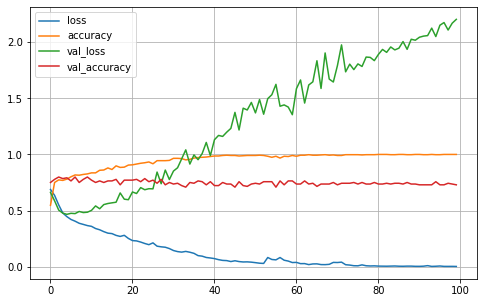

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()

plt.show()

In [ ]:
model.save("DiabetesModel.h5")

In [ ]:
X_new = X_test[:4]
X_new

array([[ 0.69715231, -0.73639255, -0.66817993,  0.81750709,  0.92437199,
         0.27456233, -0.13200422,  0.83663947],
       [-0.51358055, -0.29652073,  0.28651139,  0.75253964, -0.68955779,
         0.50094448, -0.95672768, -1.03252403],
       [-0.51358055, -0.42219839, -0.33123005, -1.32641879, -0.68955779,
        -0.15156876, -0.92748217, -1.03252403],
       [ 1.30251874, -0.45361781,  0.56730296, -1.32641879, -0.68955779,
        -0.97719777,  1.11385461,  0.07198168]])

In [ ]:
y_pred = model.predict(X_new)
print(y_pred)

[[2.2289038e-02]
 [1.0479733e-07]
 [5.3584576e-04]
 [4.9651997e-05]]


In [ ]:
X_new1 = X_test[:20]
X_new1

array([[ 0.69715231, -0.73639255, -0.66817993,  0.81750709,  0.92437199,
         0.27456233, -0.13200422,  0.83663947],
       [-0.51358055, -0.29652073,  0.28651139,  0.75253964, -0.68955779,
         0.50094448, -0.95672768, -1.03252403],
       [-0.51358055, -0.42219839, -0.33123005, -1.32641879, -0.68955779,
        -0.15156876, -0.92748217, -1.03252403],
       [ 1.30251874, -0.45361781,  0.56730296, -1.32641879, -0.68955779,
        -0.97719777,  1.11385461,  0.07198168],
       [ 0.99983553,  0.45754524,  1.1288861 , -1.32641879, -0.68955779,
        -0.27141814, -0.7754055 ,  1.43137331],
       [ 0.69715231, -0.57929547,  0.11803645,  0.75253964,  0.92437199,
         0.76727641, -0.44200666,  1.8561832 ],
       [-0.81626376, -1.58471676, -1.22976307, -0.15700467, -0.04398588,
        -1.53649483, -0.44493121, -0.94756205],
       [-1.11894698, -0.13942366, -3.92536211, -1.32641879, -0.68955779,
         0.24792914,  1.33612051,  0.92160145],
       [ 0.09178588,  1.02309471

In [ ]:
y_test[:20]

668    0
324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
667    1
212    0
199    1
265    0
760    0
356    1
501    0
457    0
604    1
213    1
Name: Outcome, dtype: int64

In [ ]:
y_pred = model.predict(X_new1)
print(y_pred)

[[2.2289038e-02]
 [1.0479732e-07]
 [5.3584576e-04]
 [4.9652001e-05]
 [2.6648343e-03]
 [1.0246336e-03]
 [3.2615712e-11]
 [9.2172897e-01]
 [9.9997163e-01]
 [9.9649894e-01]
 [9.8668045e-01]
 [1.3459012e-01]
 [8.1846917e-01]
 [3.8947672e-02]
 [7.9616846e-05]
 [4.7966838e-04]
 [8.1786513e-04]
 [3.9684681e-05]
 [1.0000000e+00]
 [9.9987060e-01]]


In [ ]:
X = dataset.iloc[204,:-1]
print(X)

Pregnancies                   6.000
Glucose                     103.000
BloodPressure                72.000
SkinThickness                32.000
Insulin                     190.000
BMI                          37.700
DiabetesPedigreeFunction      0.324
Age                          55.000
Name: 204, dtype: float64


In [ ]:
#Predicting single value for 204
a = [0.69715231, -0.57929547,  0.11803645,  0.75253964,  0.92437199,
         0.76727641, -0.44200666,  1.8561832]
b = np.array(a)
b = b.reshape(1,-1)
y_pred_single_obs = model.predict(b)     
round(float(y_pred_single_obs),2)    

0.0

In [ ]:
#Predicting values for single values 213
c = [-1.11894698,  0.5832229 , -0.27507174,  0.36273494,  0.41470995,
         1.41978966, -0.12907967, -0.7776381]
d = np.array(c)
d = d.reshape(1,-1)
y_pred_single_obs = model.predict(d)     
round(float(y_pred_single_obs),2)  

1.0

In [ ]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn import metrics
print('Accuracy Score of the model:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score of the model: 0.7239583333333334
